# UC Berkeley Extension Data Analytics Program

## Homework 6: APIs

Task: WeatherPy

Submitted by: Alejandro Montesinos

Date: March 28, 2019

## Abstract

In this exercise I analyze the relationship between several weather variables and their relationship with geographic location in relation to the equator. To acomplish this task I retrieve weather infromation for several cities from openweathermap.org using API calls.

In this analysis I collected weather information for approximately 500 cities. The cities were randomly selected by latitude and longitude coordinates. I generated random latitude and longitudes and selected the nearest city using the CitiPy package. Once the list of cities was generated I proceeded to get weather data, specifically: maximum temperature,humidity, cloudiness and wind speed from openweathermap.org through API calls.

A summary of findings is presented below:

- Maximum Temperature is higher in the equator. The graph between maximum temperature and latitud has the shape of an inverted-u. Maximum temperature increases as negative latitudes approeach the equtor (latitude 0) and decreases as positive latitudes move away from 0.
- In future analysis it is suggested to model the relationship between maximum temperature and latitude using quadratic functional form to account for the observed inverted-u shape described by the graph. 
- The graph between humidity and latitude suggest there's no relationship between this two variables as cities close to the equator don't show an humidity pattern different from cities far way from the equator.
- Cloudiness from cities close to the euqator are very similar to cities far from it. Therefore, I conclude there's no relationship between cloudiness and latitude.
- Finally, there seems to be a weak relationship between wind speed and latitude. Cities close to the equator seems to reach a maximum wind speed of approx. 6 MPH, whereas cities far from the equator with negative latitude have a maximum wind speed of 12 MPH, and cities far from the equator with positive latitudes reach up to more than 16 MPH in wind speed. 

In [1]:
#Install CitiPy
!pip install citipy

In [2]:
#Settings
import matplotlib.pyplot as plt
import pandas as pd
import numpy  as np
import requests
import time
import datetime
from datetime import date
from citipy import citipy
from config import mykey


# Preliminary Work

In this section a defien a function to format the Date variable from openweathermap.org as readable local date and time. I also save today's date in a variable to be used later in the graph titles.

In [3]:
# Define a routine to format Date data from openweathermap
def time_converter(time):
    converted_time = datetime.datetime.fromtimestamp(
        int(time)
    ).strftime("%c")
    return converted_time

In [4]:
#Store Today's date
today_dt = date.today().strftime("%m/%d/%Y")
print(today_dt)

03/31/2019


# 1. Generate Random List of Cities

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities   = []
cnames   = [] 

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000 , high=90.000 , size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    citynm  = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name       #Get City name
    cityccd = citipy.nearest_city(lat_lng[0], lat_lng[1]).country_code   #Get Country Code
    city = f"{citynm},{cityccd}"
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        cnames.append(citynm)

# Print the city count to confirm sufficient count
len(cities)
len(cnames)


636

# 2. API calls

In [6]:
#Set the base URL
base_url = "https://api.openweathermap.org/data/2.5/weather"

#Create an empty data frame to store the results from the API calls
WeatherPy = pd.DataFrame(columns=["City","Lat","Lng","MaxTemp","Humidity","Clouds","Wind","Country","Date"])
WeatherPy

,City,Lat,Lng,MaxTemp,Humidity,Clouds,Wind,Country,Date


In [7]:
#Perform the API calls


print("Beginning Data Retrieval     ")
print("--" * 20)

counter = 0           #Initialize counter
for city in cities:
    counter += 1
    print(f"Processing Record {counter} of Set 1 | {city}")
    
    try:
        params = {"q": city, "unit": "imperial", "appid": mykey}      #Set parameters for API calls
        response = requests.get(base_url, params=params).json()   #Perform API calls
        
        WeatherPy.loc[counter, "City"]     = cnames[counter-1]
        WeatherPy.loc[counter, "Lat"]      = response["coord"]["lat"]
        WeatherPy.loc[counter, "Lng"]      = response["coord"]["lon"]
        WeatherPy.loc[counter, "MaxTemp"]  = response["main"]["temp_max"]
        WeatherPy.loc[counter, "Humidity"] = response["main"]["humidity"]
        WeatherPy.loc[counter, "Clouds"]   = response["clouds"]["all"]
        WeatherPy.loc[counter, "Wind"]     = response["wind"]["speed"]
        WeatherPy.loc[counter, "Country"]  = response["sys"]["country"]
        WeatherPy.loc[counter, "Date"]     = time_converter(response["dt"])   #Format date 
        
    except:
        print("City not found. Skipping....")
        pass

print("--" * 20)
print("Data Retrieval Complete")
print("--" * 20)

Beginning Data Retrieval     
----------------------------------------
Processing Record 1 of Set 1 | yunjinghong,cn
City not found. Skipping....
Processing Record 2 of Set 1 | jaisalmer,in
Processing Record 3 of Set 1 | artyom,az
Processing Record 4 of Set 1 | carnarvon,au
Processing Record 5 of Set 1 | turukhansk,ru
Processing Record 6 of Set 1 | toba tek singh,pk
Processing Record 7 of Set 1 | faanui,pf
Processing Record 8 of Set 1 | yozgat,tr
Processing Record 9 of Set 1 | abong mbang,cm
Processing Record 10 of Set 1 | punta arenas,cl
Processing Record 11 of Set 1 | makat,kz
Processing Record 12 of Set 1 | albany,au
Processing Record 13 of Set 1 | bubaque,gw
Processing Record 14 of Set 1 | atuona,pf
Processing Record 15 of Set 1 | saint-philippe,re
Processing Record 16 of Set 1 | qaanaaq,gl
Processing Record 17 of Set 1 | chuy,uy
Processing Record 18 of Set 1 | klaksvik,fo
Processing Record 19 of Set 1 | kangaatsiaq,gl
Processing Record 20 of Set 1 | paso de carrasco,uy
Processing 

City not found. Skipping....
Processing Record 171 of Set 1 | severo-kurilsk,ru
Processing Record 172 of Set 1 | bambous virieux,mu
Processing Record 173 of Set 1 | sovetskoye,ru
Processing Record 174 of Set 1 | provideniya,ru
Processing Record 175 of Set 1 | hami,cn
Processing Record 176 of Set 1 | goundi,td
Processing Record 177 of Set 1 | mahebourg,mu
Processing Record 178 of Set 1 | tateyama,jp
Processing Record 179 of Set 1 | hay river,ca
Processing Record 180 of Set 1 | hithadhoo,mv
Processing Record 181 of Set 1 | pevek,ru
Processing Record 182 of Set 1 | dikson,ru
Processing Record 183 of Set 1 | nemuro,jp
Processing Record 184 of Set 1 | verkhnyaya toyma,ru
Processing Record 185 of Set 1 | mandali,iq
Processing Record 186 of Set 1 | berezovka,ru
Processing Record 187 of Set 1 | marcona,pe
City not found. Skipping....
Processing Record 188 of Set 1 | fairbanks,us
Processing Record 189 of Set 1 | aklavik,ca
Processing Record 190 of Set 1 | lukuledi,tz
Processing Record 191 of Se

Processing Record 339 of Set 1 | tavricheskoye,ru
Processing Record 340 of Set 1 | fort nelson,ca
Processing Record 341 of Set 1 | napanee,ca
Processing Record 342 of Set 1 | khuzhir,ru
Processing Record 343 of Set 1 | la vergne,us
Processing Record 344 of Set 1 | teya,ru
Processing Record 345 of Set 1 | mendahara,id
City not found. Skipping....
Processing Record 346 of Set 1 | yatou,cn
Processing Record 347 of Set 1 | ritchie,za
Processing Record 348 of Set 1 | rovaniemi,fi
Processing Record 349 of Set 1 | kikwit,cd
Processing Record 350 of Set 1 | tumannyy,ru
City not found. Skipping....
Processing Record 351 of Set 1 | lodja,cd
Processing Record 352 of Set 1 | santa ana de yusguare,hn
Processing Record 353 of Set 1 | san quintin,mx
City not found. Skipping....
Processing Record 354 of Set 1 | tautira,pf
Processing Record 355 of Set 1 | yarkovo,ru
Processing Record 356 of Set 1 | hakodate,jp
Processing Record 357 of Set 1 | ingersoll,ca
Processing Record 358 of Set 1 | san vicente,ph

Processing Record 503 of Set 1 | sovetskiy,ru
Processing Record 504 of Set 1 | price,us
Processing Record 505 of Set 1 | rajura,in
Processing Record 506 of Set 1 | canora,ca
Processing Record 507 of Set 1 | lake havasu city,us
Processing Record 508 of Set 1 | paradwip,in
City not found. Skipping....
Processing Record 509 of Set 1 | roswell,us
Processing Record 510 of Set 1 | dumas,us
Processing Record 511 of Set 1 | lincoln,nz
Processing Record 512 of Set 1 | altyn-topkan,tj
Processing Record 513 of Set 1 | constitucion,mx
Processing Record 514 of Set 1 | pacific grove,us
Processing Record 515 of Set 1 | gulshat,kz
City not found. Skipping....
Processing Record 516 of Set 1 | warwick,au
Processing Record 517 of Set 1 | lagoa,pt
Processing Record 518 of Set 1 | bereda,so
City not found. Skipping....
Processing Record 519 of Set 1 | jalu,ly
Processing Record 520 of Set 1 | kununurra,au
Processing Record 521 of Set 1 | kruisfontein,za
Processing Record 522 of Set 1 | nizhniy baskunchak,ru

In [8]:
#Edit data frame with results from the API calls
WeatherPy["City"] = WeatherPy["City"].str.capitalize() 
WeatherPy=WeatherPy.dropna()
WeatherPy=WeatherPy.reset_index(drop=True)
WeatherPy.head()

,City,Lat,Lng,MaxTemp,Humidity,Clouds,Wind,Country,Date
0,Jaisalmer,26.91,70.91,309.54,29,0,2.05,IN,Sun Mar 31 23:54:19 2019
1,Artyom,40.47,50.33,283.15,81,90,6.2,AZ,Sun Mar 31 23:30:00 2019
2,Carnarvon,-24.87,113.63,303.15,62,36,6.2,AU,Sun Mar 31 23:00:00 2019
3,Turukhansk,65.8,87.96,272.24,100,76,3.4,RU,Sun Mar 31 23:54:20 2019
4,Toba tek singh,30.98,72.49,303.54,62,0,2.05,PK,Sun Mar 31 23:54:02 2019


In [9]:
#Save data frame into a CSV data set
WeatherPy.to_csv("./output_data/WeatherPy_data.csv", index_label="City_ID")

# 3.  Latitude and Temperature

In [10]:
%matplotlib notebook

<IPython.core.display.Javascript object>


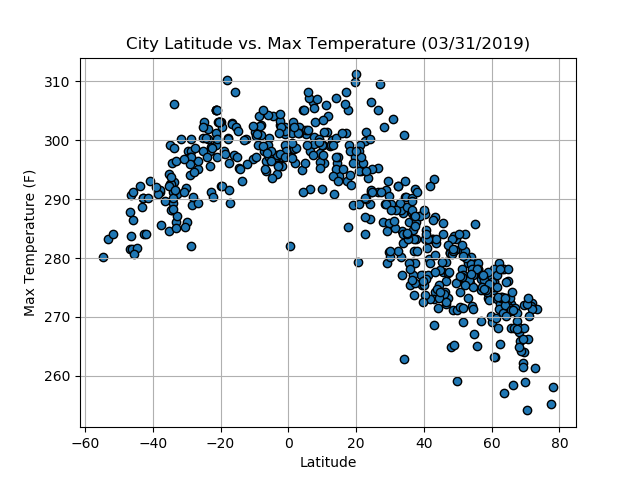

In [11]:
#Extract series from dataframe
lat_series     = WeatherPy["Lat"]
maxtemp_series = WeatherPy["MaxTemp"]

#Generate Scatter Plot 
plt.scatter(lat_series, maxtemp_series, edgecolor="black", linewidths=1, marker="o", label="Cities")

#Edit Scatterplot
plt.title(f"City Latitude vs. Max Temperature ({today_dt})")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#Save Figure
plt.show()
plt.savefig("./figures/Fig1_Latitude_vs_MaxTemp.png")

# 4.  Latitude and Humidity


In [12]:
%matplotlib notebook

<IPython.core.display.Javascript object>


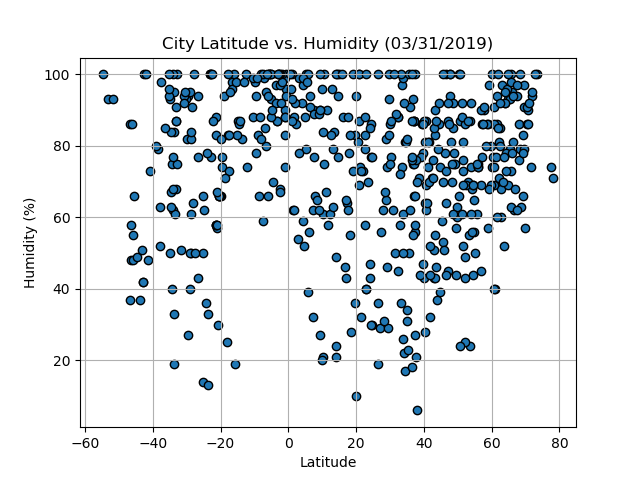

In [13]:
#Extract series from dataframe
humidity_series = WeatherPy["Humidity"]

#Generate Scatter Plot 
plt.scatter(lat_series, humidity_series, edgecolor="black", linewidths=1, marker="o", label="Cities")

#Edit Scatterplot
plt.title(f"City Latitude vs. Humidity ({today_dt})")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

#Save Figure
plt.show()
plt.savefig("./figures/Fig2_Latitude_vs_Humidity.png")

# 5. Latitude and Cloudiness

In [14]:
%matplotlib notebook

<IPython.core.display.Javascript object>


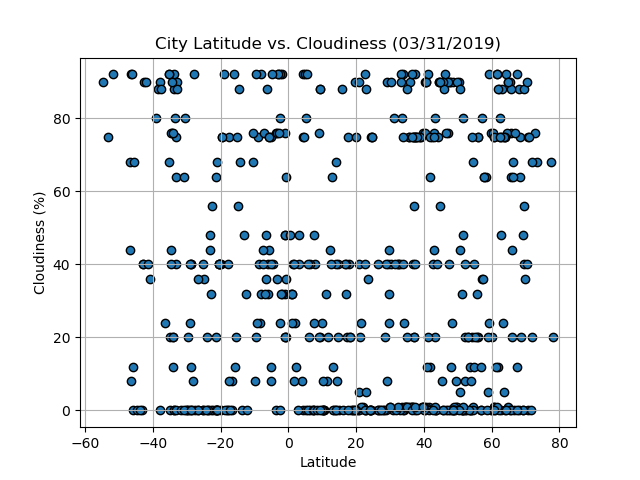

In [15]:
#Extract series from dataframe
cloud_series = WeatherPy["Clouds"]

#Generate Scatter Plot 
plt.scatter(lat_series, cloud_series, edgecolor="black", linewidths=1, marker="o", label="Cities")

#Edit Scatterplot
plt.title(f"City Latitude vs. Cloudiness ({today_dt})")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

#Save Figure
plt.show()
plt.savefig("./figures/Fig3_Latitude_vs_Cloudiness.png")

# 6. Latitude and Wind Speed

In [16]:
%matplotlib notebook

<IPython.core.display.Javascript object>


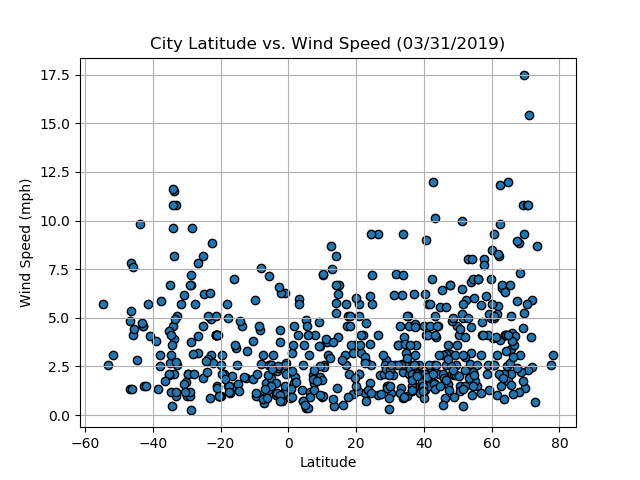

In [17]:
#Extract series from dataframe
wind_series = WeatherPy["Wind"]

#Generate Scatter Plot 
plt.scatter(lat_series, wind_series, edgecolor="black", linewidths=1, marker="o", label="Cities")

#Edit Scatterplot
plt.title(f"City Latitude vs. Wind Speed ({today_dt})")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

#Save Figure
plt.show()
plt.savefig("./figures/Fig4_Latitude_vs_WindSpeed.png")

# End of Notebook